# * Avacado Project

# Problem Statement:

# Avocado is a fruit consumed by people heavily in the United States. 

# Content

# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

# The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

# Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Some relevant columns in the dataset:

# Date - The date of the observation
# AveragePrice - the average price of a single avocado
# type - conventional or organic
# year - the year
# Region - the city or region of the observation
# Total Volume - Total number of avocados sold
# 4046 - Total number of avocados with PLU 4046 sold
# 4225 - Total number of avocados with PLU 4225 sold
# 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label 

# The dataset can be seen in two angles to find the region and find the average price .

# Task: One of Classification and other of Regression

# Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\yjjai\Downloads\avocado.csv\avocado.csv")

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
#Lets check the shape of dataset
data.shape

(18249, 14)

# Data is Duplicated ?

In [5]:
data.duplicated().sum()

0

In [6]:
#Lets check the data type of dataset
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
#Checking the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#Checking null values in dataset
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
#Checking description of dataset
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Basic Analysis with Visualisation

<AxesSubplot:>

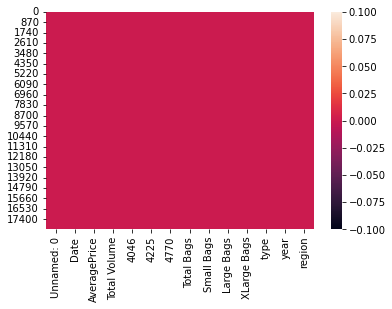

In [10]:
sns.heatmap(data.isnull())

# Drop Unwanted columns

In [11]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
data.shape

(18249, 13)

In [13]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


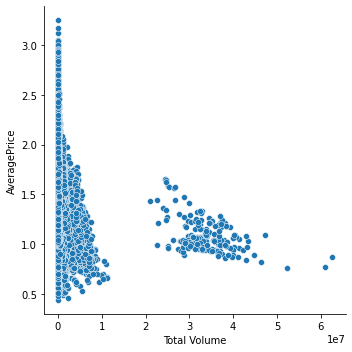

In [14]:
sns.relplot(x='Total Volume',y='AveragePrice',data=data,kind='scatter')
plt.show()

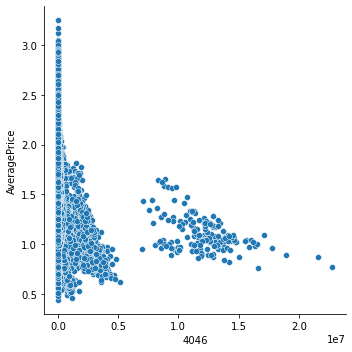

In [15]:
sns.relplot(x='4046',y='AveragePrice',data=data,kind='scatter')
plt.show()

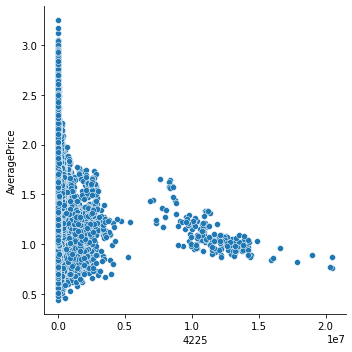

In [16]:
sns.relplot(x='4225',y='AveragePrice',data=data,kind='scatter')
plt.show()

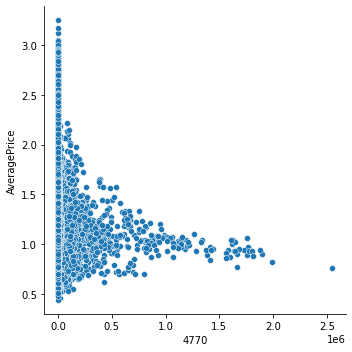

In [17]:
sns.relplot(x='4770',y='AveragePrice',data=data,kind='scatter')
plt.show()

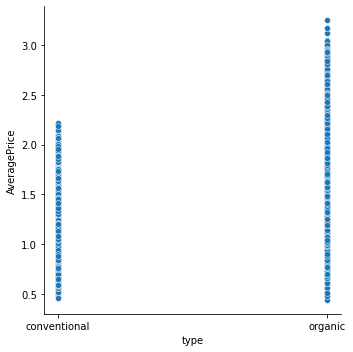

In [18]:
sns.relplot(x='type',y='AveragePrice',data=data,kind='scatter')
plt.show()

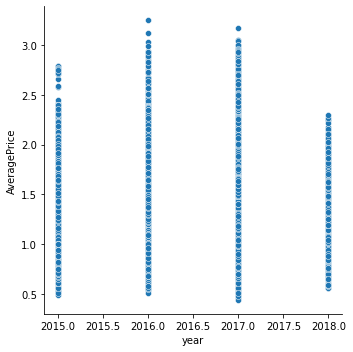

In [19]:
sns.relplot(x='year',y='AveragePrice',data=data,kind='scatter')
plt.show()

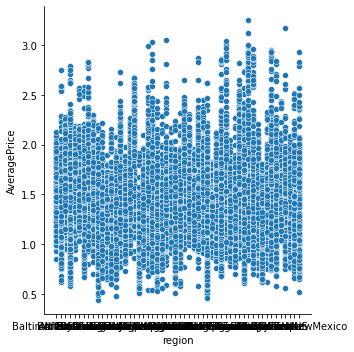

In [20]:
sns.relplot(x='region',y='AveragePrice',data=data,kind='scatter')
plt.show()

In [21]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

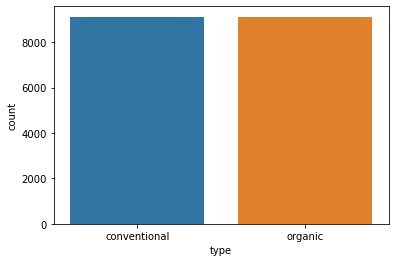

conventional    9126
organic         9123
Name: type, dtype: int64

In [23]:
#Lets plot type data .Using count plot
sns.countplot(x='type',data=data)
plt.show()
data['type'].value_counts()

In [24]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

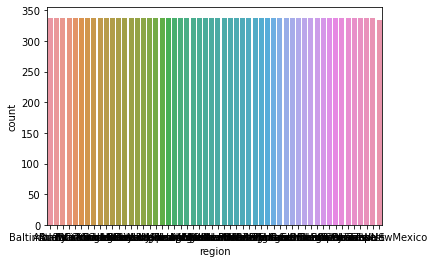

In [25]:
#Lets plot region data .Using count plot
sns.countplot(x='region',data=data)
plt.show()

# converting categorical feature to Numerical

# Using LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lab_enc=LabelEncoder()

In [28]:
df2 = lab_enc.fit_transform(data['type'])
pd.Series(df2)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

In [29]:
df3 = lab_enc.fit_transform(data['region'])
pd.Series(df3)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int32

In [30]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [31]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [32]:
data['type']=df2
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [33]:
data['region']=df3
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [34]:
#Date:
# Date - The date of the observation
data['Date'].nunique()

169

In [35]:
data[['Year','Month','Date']] = data['Date'].str.split("-",expand = True)

In [36]:
# converting objects into integer datatype

data[['Year','Month','Date']] = data[['Year','Month','Date']].astype(int)

In [37]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,2015,11


In [38]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [39]:
data['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [40]:
data.drop(['year'],axis=1, inplace=True)

In [41]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


In [42]:
data.shape

(18249, 14)

In [43]:
data['type'].nunique()

2

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  region        18249 non-null  int32  
 12  Year          18249 non-null  int32  
 13  Month         18249 non-null  int32  
dtypes: float64(9), int32(5)
memory usage: 1.6 MB


# Now out data is ready for further work

# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

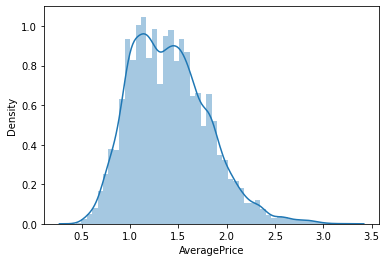

In [45]:
# Average Price
sns.distplot(data['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Year'>

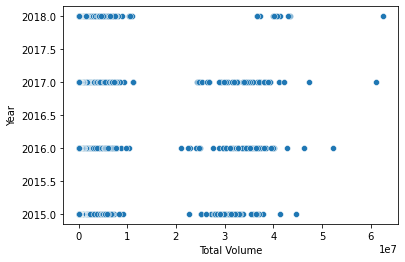

In [46]:
# Total Volume :   total number of avacado cold
sns.scatterplot('Total Volume','Year',data=data)

<AxesSubplot:xlabel='Year', ylabel='Total Volume'>

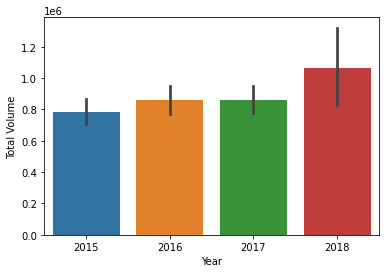

In [47]:
# we have records of sales of Avacado in 2015-2018 year
sns.barplot(y='Total Volume',x='Year', data=data)

# our sales is slowly slowly grow

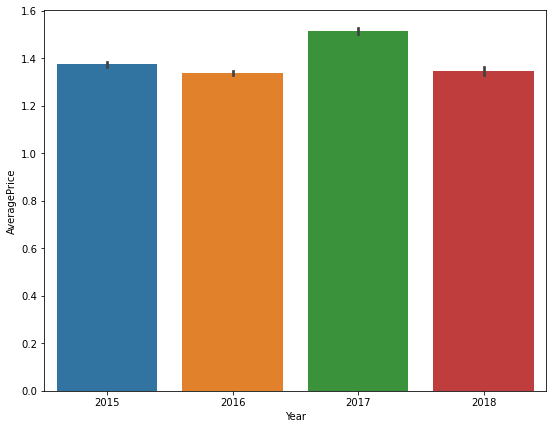

In [48]:
# we have records of sales of Avacado in 2015-2018 year
plt.figure(figsize=(9,7))
sns.barplot(y='AveragePrice',x='Year', data=data)
plt.show()

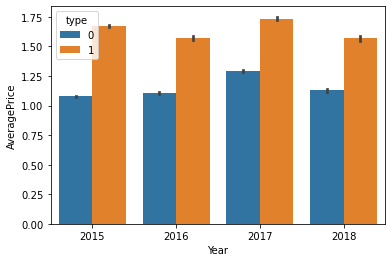

In [49]:
# Total sale by year by type
sns.barplot(y='AveragePrice',x='Year',hue='type', data=data)
plt.show()

In [50]:
# Find Average price by type of avacado

data.groupby('type')['AveragePrice'].mean()

type
0    1.158040
1    1.653999
Name: AveragePrice, dtype: float64

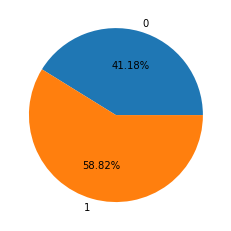

In [51]:
plt.pie( data.groupby('type')['AveragePrice'].mean().values, labels= data.groupby('type')['AveragePrice'].mean().index, autopct='%1.2f%%'  )
plt.show()

In [52]:
# Which type sold more, if price have any impact on sold

data.groupby('type')['Total Volume'].sum()

type
0    1.508722e+10
1    4.361817e+08
Name: Total Volume, dtype: float64

In [53]:
data['type'].unique()

array([0, 1])

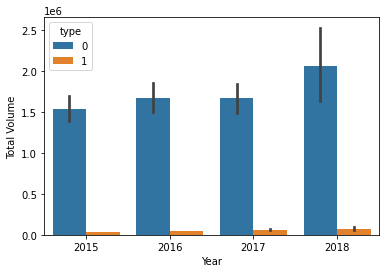

In [54]:
# Total sale by year by type
sns.barplot(y='Total Volume',x='Year',hue='type', data=data)
plt.show()

In [55]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


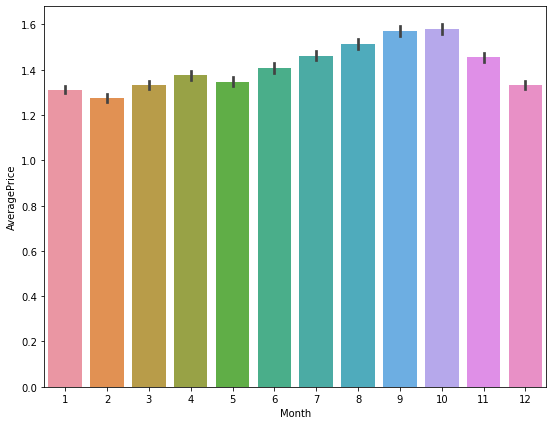

In [56]:
# we have records of sales of Avacado in monthly
plt.figure(figsize=(9,7))
sns.barplot(y='AveragePrice',x='Month', data=data)
plt.show()

# we have records of sales of Avacado in  Total number of avocados with PLU 4046 sold

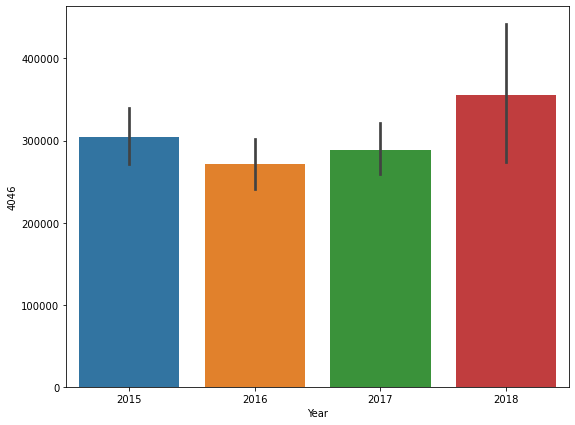

In [57]:
plt.figure(figsize=(9,7))
sns.barplot(y='4046',x='Year', data=data)
plt.show()

# we have records of sales of Avacado in Total number of avocados with PLU 4225 sold

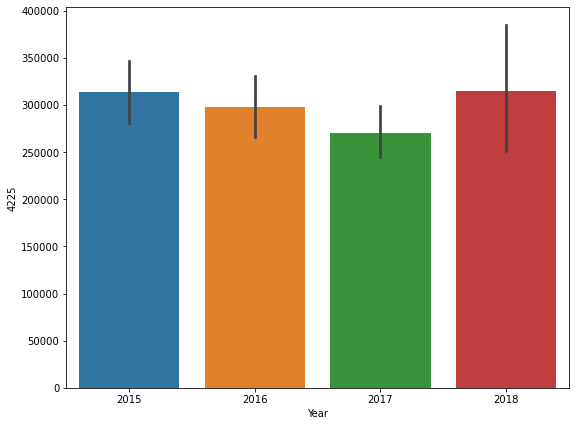

In [58]:
plt.figure(figsize=(9,7))
sns.barplot(y='4225',x='Year', data=data)
plt.show()

# we have records of sales of Avacado in Total number of avocados with PLU 4770 sold

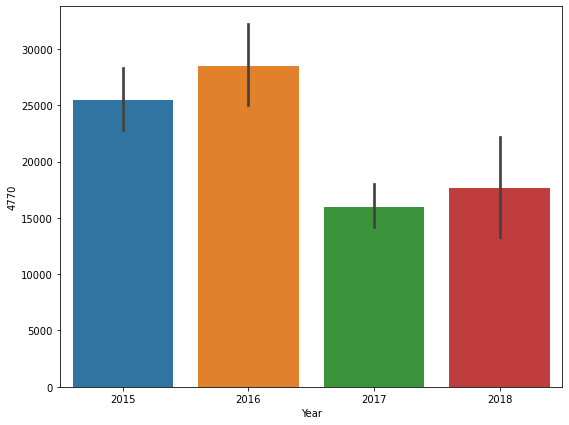

In [59]:
plt.figure(figsize=(9,7))
sns.barplot(y='4770',x='Year', data=data)
plt.show()

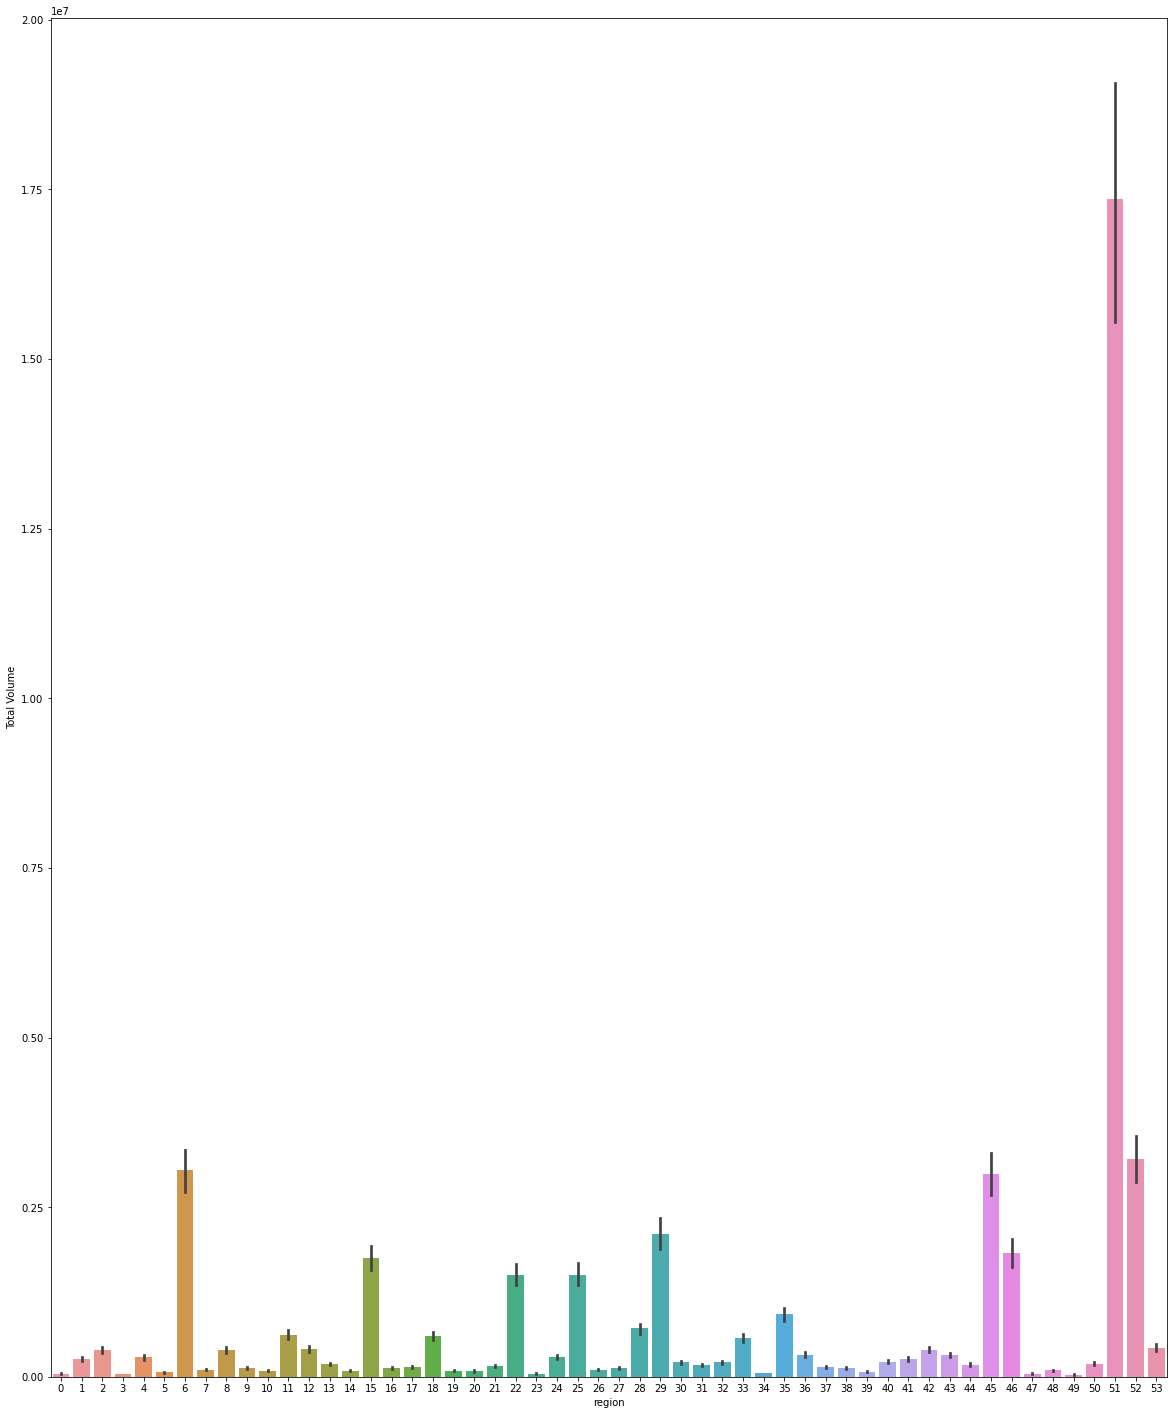

In [60]:
# we have records of sales of Avacado in region
plt.figure(figsize=(20,25))
sns.barplot(y='Total Volume',x='region', data=data)
plt.show()

In [61]:
data.groupby('Year')['AveragePrice'].mean()

Year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

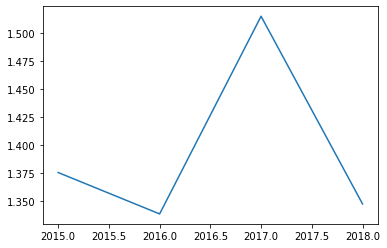

In [62]:
plt.plot(data.groupby('Year')['AveragePrice'].mean().index, data.groupby('Year')['AveragePrice'].mean().values  )

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

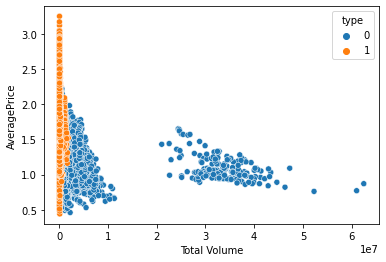

In [63]:
sns.scatterplot('Total Volume','AveragePrice',hue='type',data=data)

In [64]:
data.shape

(18249, 14)

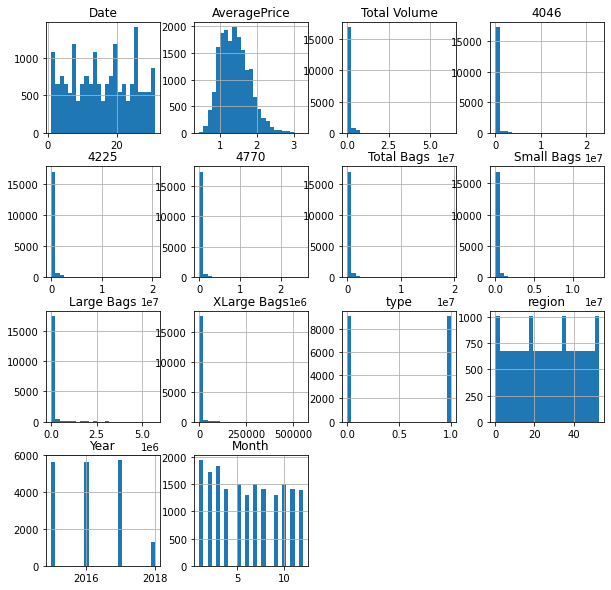

In [65]:
data.hist(figsize=(10,10), bins=25)
plt.show()

# correlation

In [66]:
data.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
Date,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.003870,-0.008352,0.000319,-0.000013,-0.000021,0.004475,0.010621
AveragePrice,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.093197,0.162409
Total Volume,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.017193,-0.024689
4046,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,0.003353,-0.025803
4225,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.009559,-0.022108
4770,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.036531,-0.033424
Total Bags,-0.004988,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.071552,-0.022724
Small Bags,-0.003870,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.063915,-0.023126
Large Bags,-0.008352,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.087891,-0.020187
XLarge Bags,0.000319,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.081033,-0.012969


<AxesSubplot:>

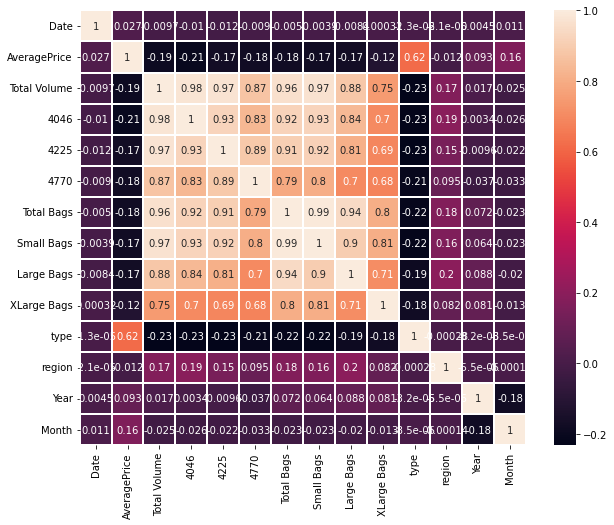

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linecolor='white',linewidths=.25)

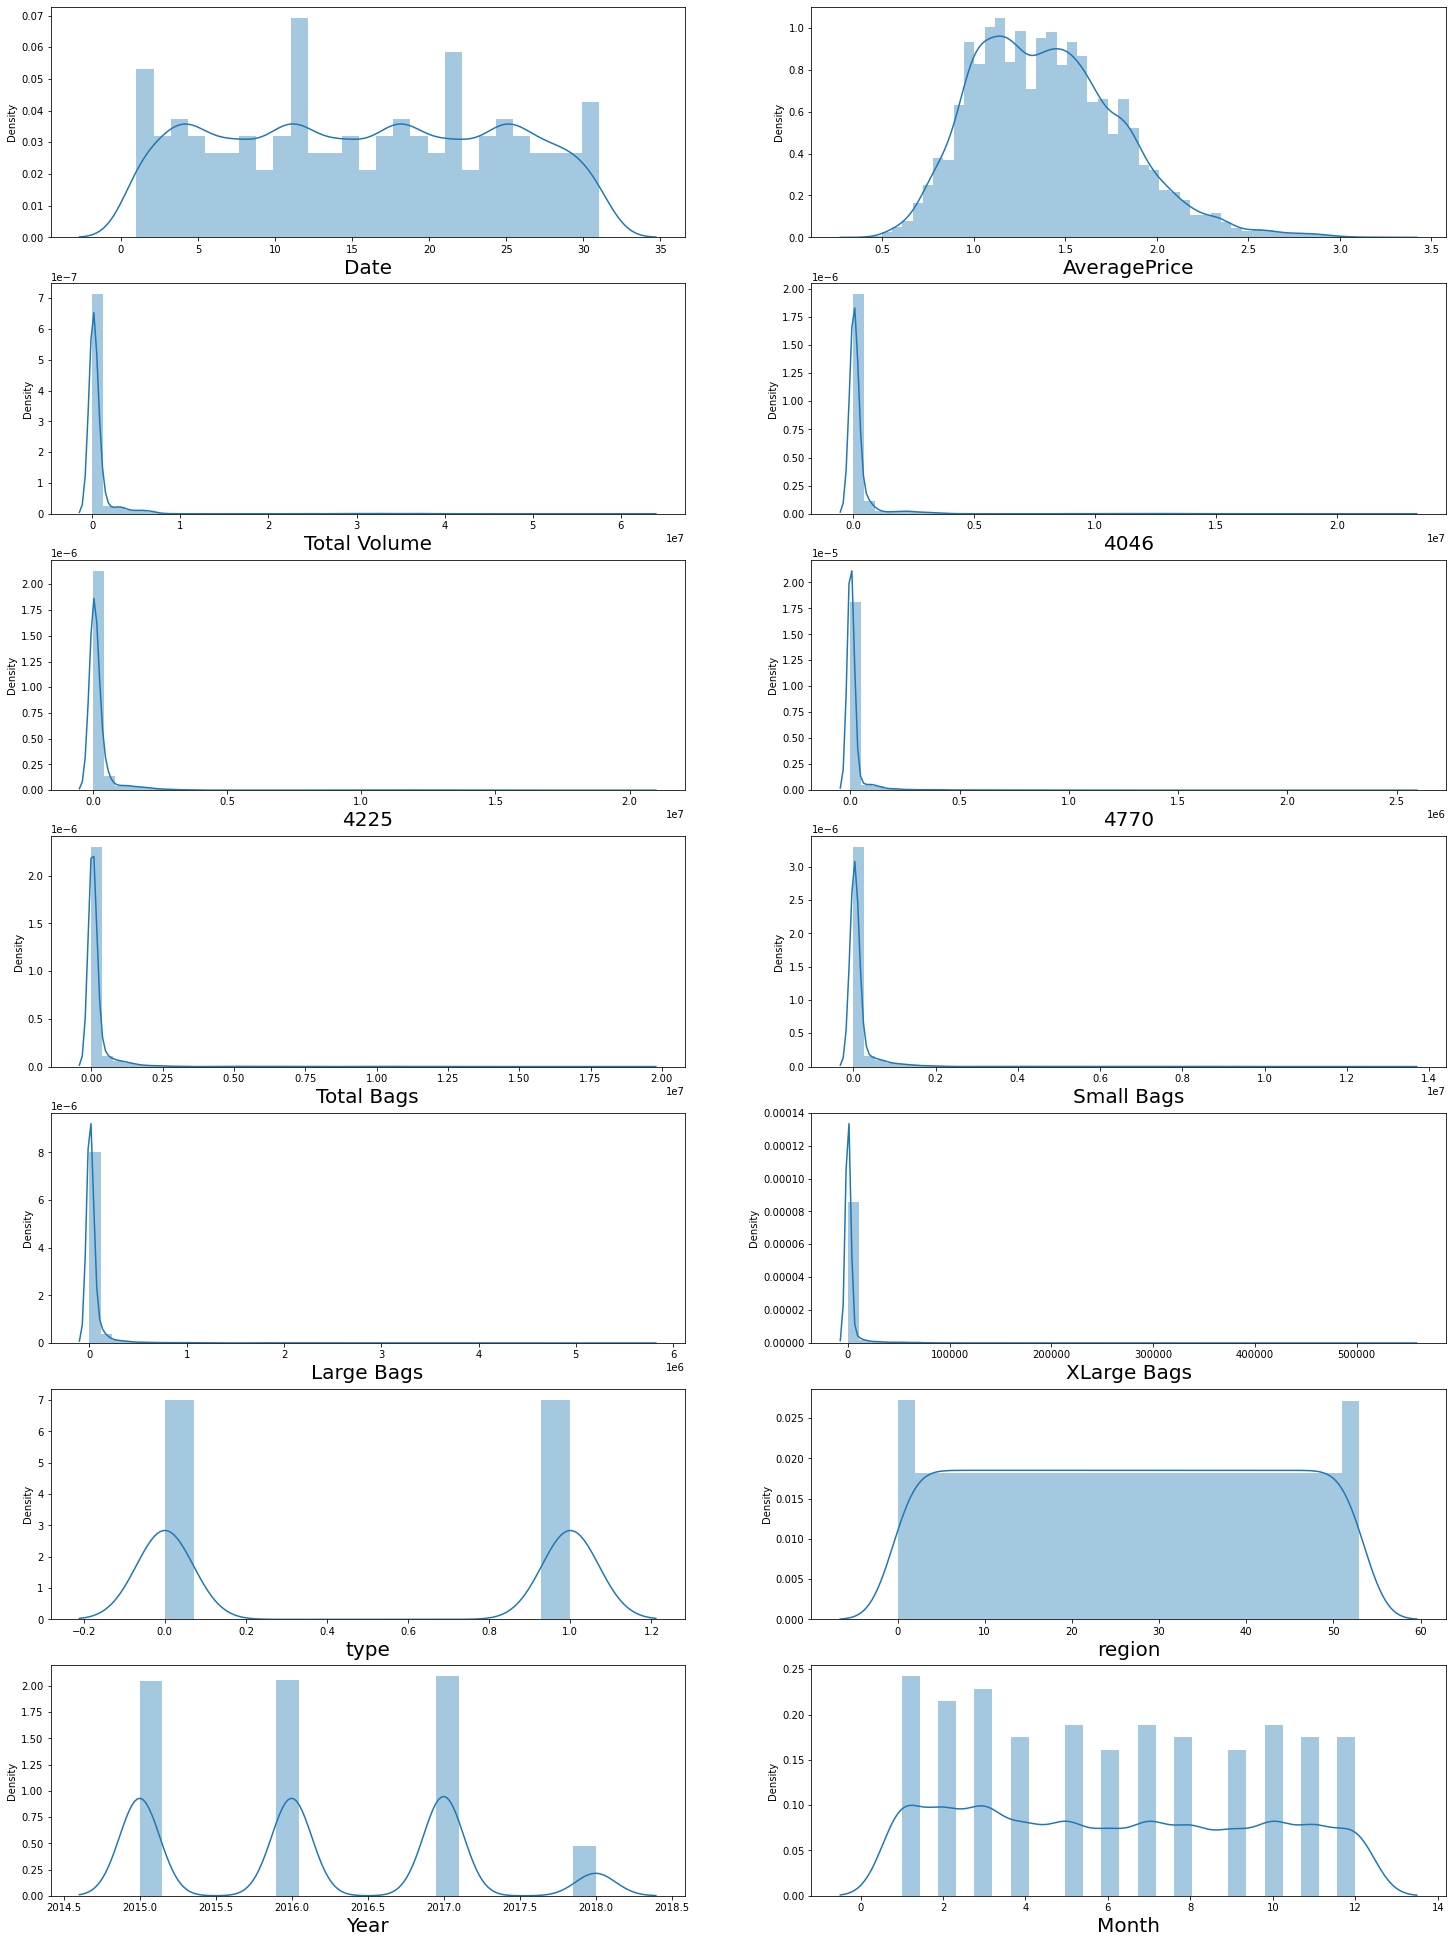

In [68]:
plt.figure(figsize=(25,50))
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# BOXPLOT

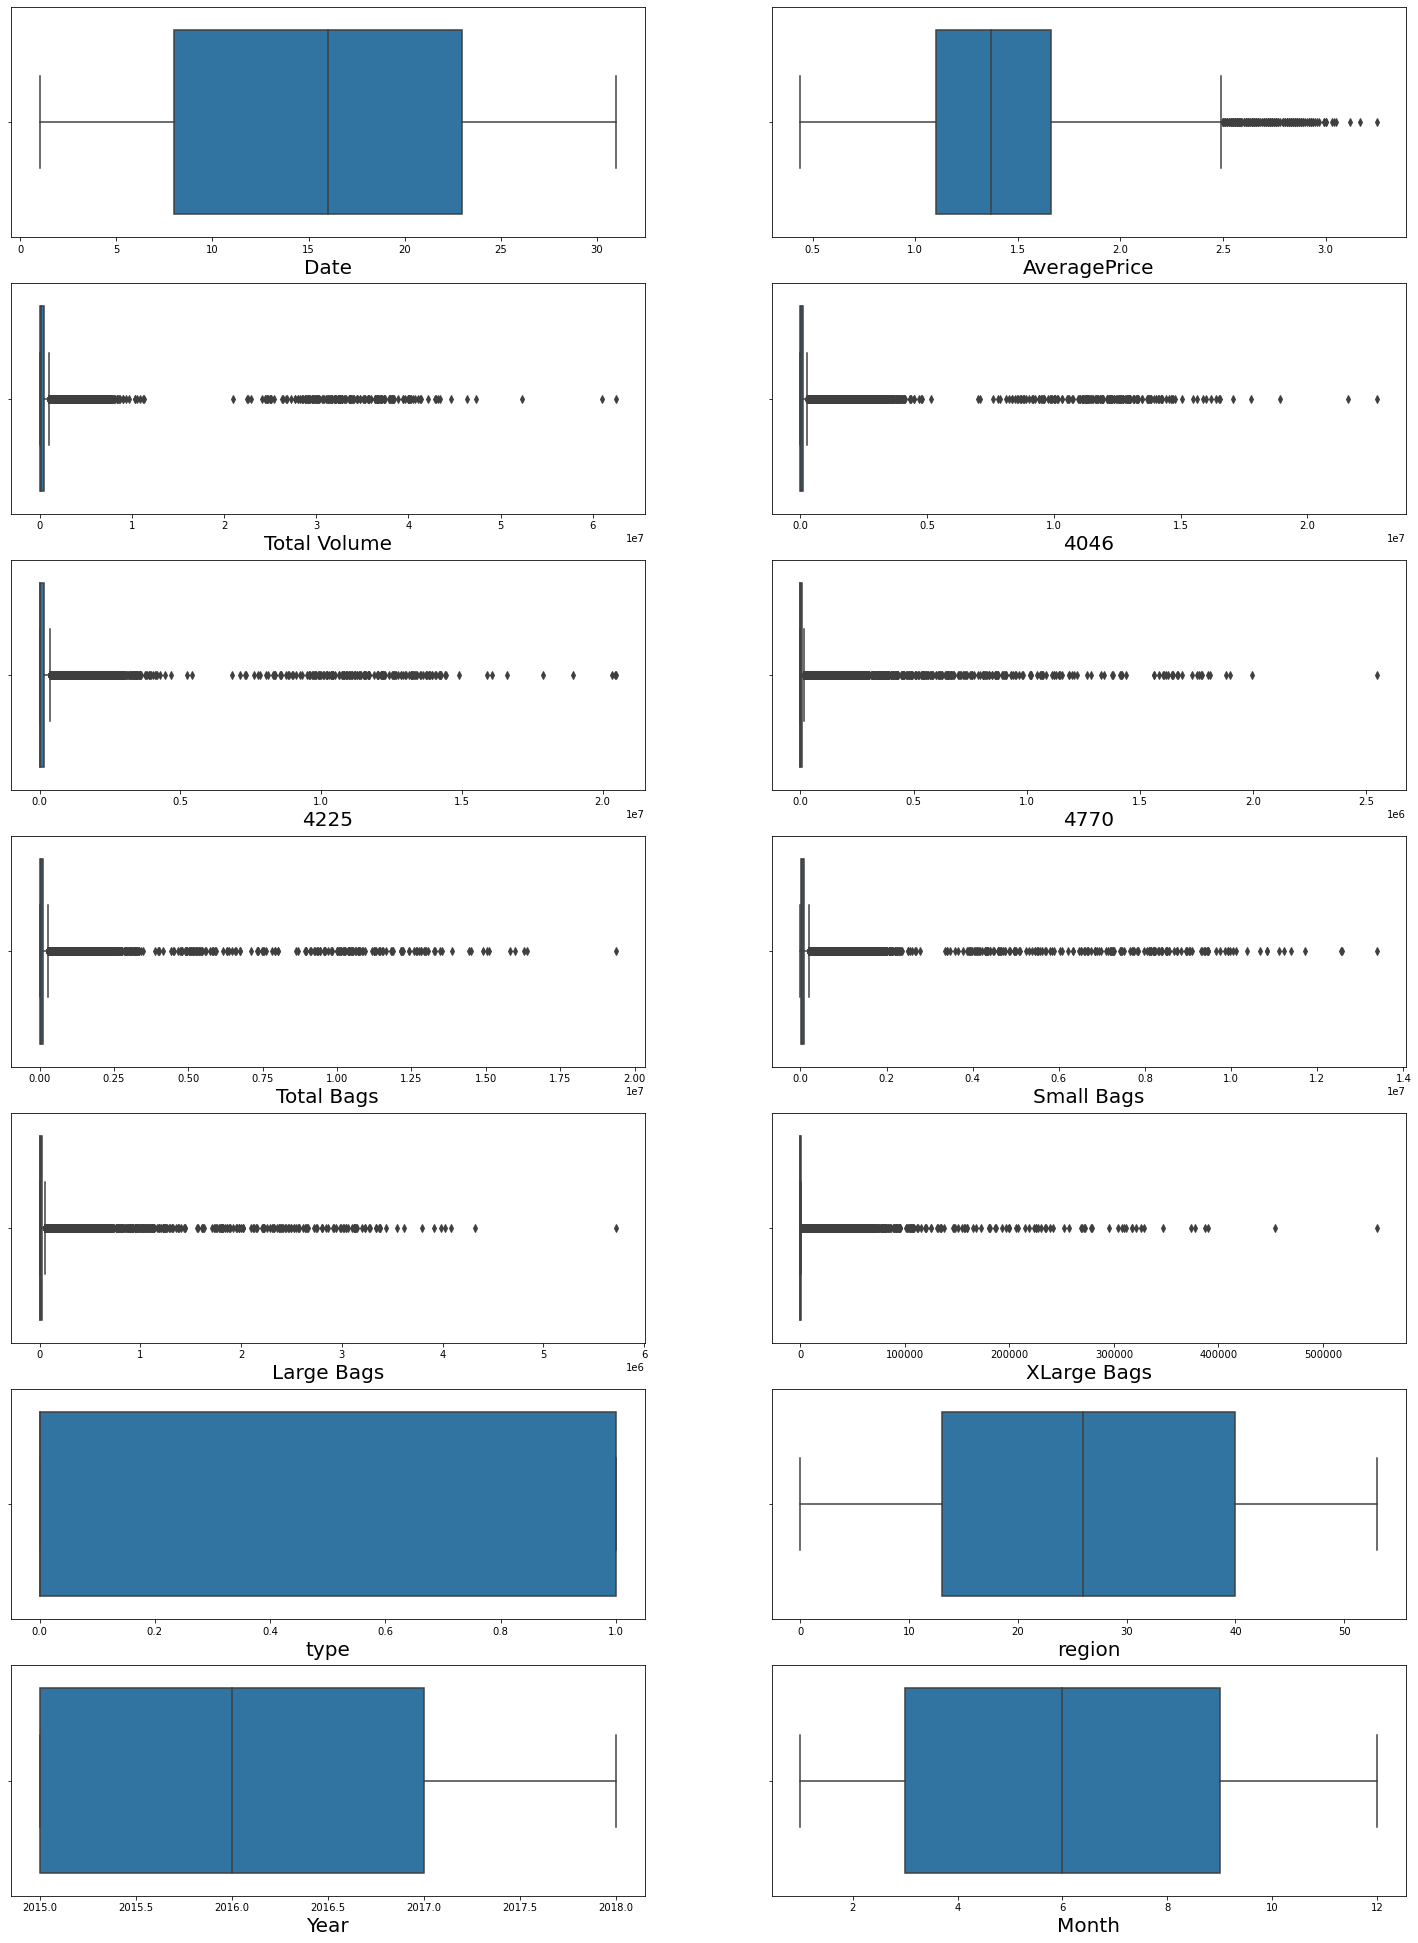

In [69]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in data:
    if plotnumber <=14:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [70]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'Year', 'Month'],
      dtype='object')

In [71]:
# Total Bage are the sum of Small Bags + Large Bags + XLarge Bags

In [72]:
data['Total Bags'].sum()

4373175798.389999

In [73]:
data['Small Bags'].sum() + data['Large Bags'].sum() +data['XLarge Bags'].sum()

4373175785.39

In [74]:
# we dnt need total bags column here, because it is captured by  other bags categtory

# Removing Outliers:

# Zscore method:

In [75]:
from scipy.stats import zscore
z_score=zscore(data[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score=np.abs(z_score)

In [76]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
count,17651.000000,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,15.685400,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,0.509433,26.103110,2016.137669,6.178347
std,8.775959,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,0.499925,15.396005,0.940239,3.539935
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000
25%,8.000000,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,0.000000,13.000000,2015.000000,3.000000
50%,16.000000,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,1.000000,26.000000,2016.000000,6.000000
75%,23.000000,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,1.000000,39.000000,2017.000000,9.000000
max,31.000000,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,53.000000,2018.000000,12.000000


In [77]:
data.shape

(17651, 14)

In [78]:
data.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
dtype: float64

In [79]:
num_new=data.drop(['AveragePrice','Date','type','region','Month','Year'], axis=1)

In [80]:
num_new.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
dtype: float64

In [81]:
num_new.shape

(17651, 8)

# Transformation to remove skewness

In [82]:
from sklearn.preprocessing import power_transform
transformed=power_transform(num_new)

In [83]:
transformed=pd.DataFrame(transformed)
transformed.columns=num_new.columns

In [84]:
transformed.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
dtype: float64

In [85]:
transformed.head(3)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919


In [86]:
transformed.shape

(17651, 8)

# PCA to handle Dimentionality Reduction

In [87]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(transformed)

In [88]:
from sklearn.decomposition import PCA
pca= PCA()

In [89]:
principal_component=pca.fit_transform(scaled)

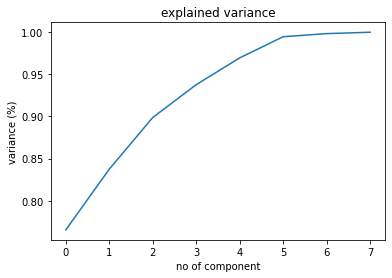

In [90]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [91]:
# Graph shows 5 components has explained 97% variance of all features, so use 5

In [92]:
pca=PCA(n_components=5)

In [93]:
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5'])

In [94]:
principal_x

,PC1,PC2,PC3,PC4,PC5
0,-0.978560,0.053037,0.716700,0.349742,-0.374346
1,-1.031942,0.061697,0.679729,0.319374,-0.501365
2,-0.712807,0.072698,0.826290,0.629765,-0.523718
3,-0.957359,0.035349,0.672164,0.618836,-0.311211
4,-1.081982,-0.006168,0.536034,0.550660,-0.351838
...,...,...,...,...,...
17646,-1.718912,-0.360061,0.042925,-0.838342,0.138421
17647,-1.862576,-0.284995,0.049341,-0.607442,0.034699
17648,-1.446887,0.355266,0.620962,0.351371,-0.376864
17649,-1.309118,0.316114,0.654314,0.315265,-0.354891


# Dividing data in feature and vectors

In [95]:
x=data.drop(columns='AveragePrice')#Feature
y=data.AveragePrice#Target

In [96]:
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,6,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2018,2
18245,28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,2018,1
18246,21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,2018,1
18247,14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,2018,1


In [97]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.28930873, -0.3920086 , -0.34945151, ..., -1.69549505,
        -1.21001338,  1.64461178],
       [ 0.49165249, -0.40125088, -0.3502761 , ..., -1.69549505,
        -1.21001338,  1.64461178],
       [-0.30600376, -0.33870193, -0.35000214, ..., -1.69549505,
        -1.21001338,  1.64461178],
       ...,
       [ 0.60560338, -0.44184559, -0.34909848, ...,  1.74705401,
         1.98075592, -1.46287832],
       [-0.19205286, -0.43943771, -0.34833475, ...,  1.74705401,
         1.98075592, -1.46287832],
       [-0.98970911, -0.43816945, -0.34522454, ...,  1.74705401,
         1.98075592, -1.46287832]])

# Now use VIF for checking multicollinearity problem

In [98]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [99]:
#Lets check how lookinf VIF score
vif

,vif,feature
0,1.000992e+00,Date
1,4.127969e+08,Total Volume
2,7.777070e+07,4046
3,6.410838e+07,4225
4,4.787390e+05,4770
5,1.924615e+13,Total Bags
6,1.275807e+13,Small Bags
7,1.290985e+12,Large Bags
8,6.647527e+09,XLarge Bags
9,1.232129e+00,type


# Lets Build a Model

In [100]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.4473029946267304
 At random state 0 , the testing accuracy is :- 0.4252330984147594


 At random state 1 , the Training accuracy is :- 0.44470070263049233
 At random state 1 , the testing accuracy is :- 0.4358444969229911


 At random state 2 , the Training accuracy is :- 0.44607725561762435
 At random state 2 , the testing accuracy is :- 0.42981852306691726


 At random state 3 , the Training accuracy is :- 0.4389383838143144
 At random state 3 , the testing accuracy is :- 0.45868595828782877


 At random state 4 , the Training accuracy is :- 0.44324505439901307
 At random state 4 , the testing accuracy is :- 0.4414805529094008


 At random state 5 , the Training accuracy is :- 0.4429710266534488
 At random state 5 , the testing accuracy is :- 0.4422937260951998


 At random state 6 , the Training accuracy is :- 0.4347051736545887
 At random state 6 , the testing accuracy is :- 0.47463605264996933


 At random state 7 , the Training a

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=95)

In [103]:
lr.fit(x_train,y_train)

LinearRegression()

In [104]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.4411986865120252


In [105]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.44923930358544806


# Cross Validation of the Model

In [106]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is -15122250.863933573 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 3 the CV Score is -37.02451874527829 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 4 the CV Score is -34.147598892028505 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 5 the CV Score is -30.518016258231278 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 6 the CV Score is -0.5446912968653985 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 7 the CV Score is 0.018641759196227965 and accuracy for training is -0.44757410580659784 and accuracy for testing is -0.45526401731095767


At cross fold 8 the CV Score is -0.011209193544456236 and accuracy for training is

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line¶

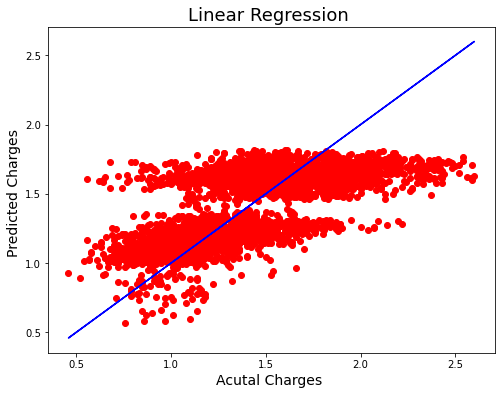

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [109]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')

lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [110]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

1.9831939883014384e-06

In [111]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.9831939883014384e-06)

In [112]:
lasso_reg.score(x_train,y_train)#Testing Score

0.44118018223187727

In [113]:
lasso_reg.score(x_test,y_test) #Testing Score

0.44921176318401423

# Using Ridge Regression Model.

In [114]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [115]:
ridgecv.alpha_

0.001

In [116]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [117]:
ridge_model.score(x_train,y_train)#Training Score

0.4411986843279464

In [118]:
ridge_model.score(x_test,y_test)#Testing Score

0.4492384701654336

# Model Evaluation

In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [120]:
y_pred=ridge_model.predict(x_test)

In [121]:
#MAE
mean_absolute_error(y_test,y_pred)

0.22618990260810665

In [122]:
#MSE
mean_squared_error(y_test,y_pred)

0.08338846357467028

In [123]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.2887706071861717

# Lets Plot With Decision Tree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [125]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.7504009520104384


 At random state 1 , the Training accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.7666829511513141


 At random state 2 , the Training accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.7546340523926152


 At random state 3 , the Training accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.7693986654077202


 At random state 4 , the Training accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.7648047415820904


 At random state 5 , the Training accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.7462616922545127


 At random state 6 , the Training accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.7719416526557361


 At random state 7 , the Training accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.7575598911062069


 At random state 8 , the

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)

In [127]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [128]:
#Lets Print Training Score
pred_train=dt.predict(x_train)
print(r2_score(y_train,pred_train))

1.0


In [129]:
#Lets Print Testing Score
train_pred=dt.predict(x_test)
print(r2_score(y_test,train_pred))

0.766675994550485


# Cross Validation of the Model

In [130]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is -2.0510160731580576 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 3 the CV Score is -0.39903641144327123 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 4 the CV Score is -0.31127137637771746 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 5 the CV Score is -0.2353795663139911 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 6 the CV Score is -0.4443141624853412 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 7 the CV Score is -0.16235717523700147 and accuracy for training is -0.9864130384535832 and accuracy for testing is -0.9265840017904177


At cross fold 8 the CV Score is -0.3084035057023639 and accuracy for training is -0.9864130

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

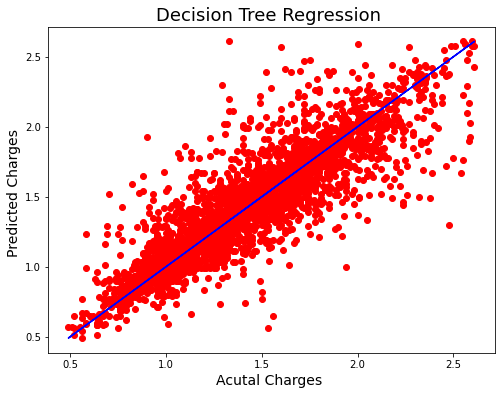

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Decision Tree Regression ",fontsize=18)
plt.savefig('dt.png')
plt.show()

# Lets Plot With Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [133]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9839525043018882
 At random state 0 , the testing accuracy is :- 0.890220773564495


 At random state 1 , the Training accuracy is :- 0.9838592873917976
 At random state 1 , the testing accuracy is :- 0.884376289861921


 At random state 2 , the Training accuracy is :- 0.9840592629231469
 At random state 2 , the testing accuracy is :- 0.8808080157111237


 At random state 3 , the Training accuracy is :- 0.9841158108960611
 At random state 3 , the testing accuracy is :- 0.8998309113971187


 At random state 4 , the Training accuracy is :- 0.9843586135828173
 At random state 4 , the testing accuracy is :- 0.8922761126377478


 At random state 5 , the Training accuracy is :- 0.9838745785287367
 At random state 5 , the testing accuracy is :- 0.8922090819793058


 At random state 6 , the Training accuracy is :- 0.9842700641035661
 At random state 6 , the testing accuracy is :- 0.8916720068240452


 At random state 7 , the Training accuracy 

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=40)

In [135]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9839363885463486


In [137]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.8915818942366847


# Cross Validation of the Model

In [138]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is -1.0894097878998563 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 3 the CV Score is 0.05185976190650824 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 4 the CV Score is 0.1352636505820049 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 5 the CV Score is 0.2180847397110311 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 6 the CV Score is 0.19863144723887272 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 7 the CV Score is 0.28905893641966174 and accuracy for training is -0.9181168766449599 and accuracy for testing is -0.7706639554132568


At cross fold 8 the CV Score is 0.30241718203769996 and accuracy for training is -0.918116876644

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

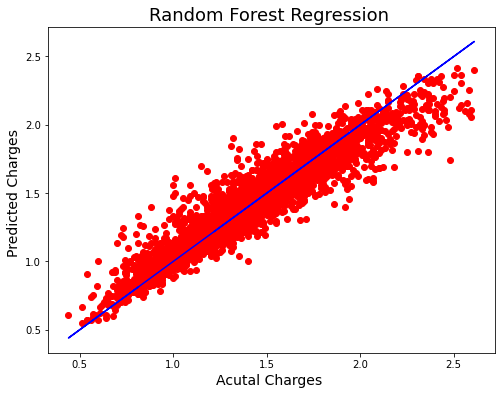

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Random Forest Regression ",fontsize=18)
plt.savefig('rf.png')
plt.show()

# We got accuracy So we dont do the hyperparameter tuning.

In [140]:
parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(10,15),
          'min_samples_split':range(9,10),
          'min_samples_leaf':range(5,6)}

In [141]:
dt = DecisionTreeRegressor()
clf=GridSearchCV(dt,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 9}


In [142]:
dt=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=14,min_samples_leaf=6,min_samples_split=9)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("R2 Score",dts*100)
dts_score=cross_val_score(dt,x,y,cv=5)
dtc=dts_score.mean()
print('Cross Val Score',dtc*100)

R2 Score 79.9992421009727
Cross Val Score -13.138850329657714


# Prediction with Region

In [143]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


In [144]:
data['region'].nunique()

54

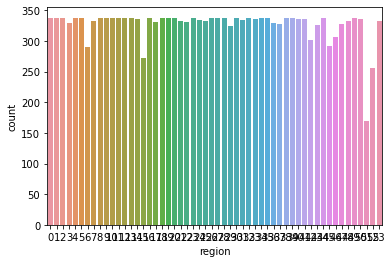

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [145]:
# we have records  of Avacado in region
sns.countplot(x='region',data=data)
plt.show()
data['region'].value_counts()

# Dividing data in feature and vectors

In [146]:
a=data.drop(columns='region')#Feature
b=data.region#Target

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
smt=SMOTE()
a_sample,b_sample=smt.fit_resample(a,b)

In [149]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [150]:
from sklearn.metrics import accuracy_score,classification_report

In [151]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(a,b,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  11 The Model Performs Very Well
At random State  11 The Model performs very well
Training Accuracy Score is :-  16.699716713881017
Testing Accuracy Score is : -  16.737468139337295 

At Radom State  29 The Model Performs Very Well
At random State  29 The Model performs very well
Training Accuracy Score is :-  16.628895184135978
Testing Accuracy Score is : -  16.567544604927782 

At Radom State  35 The Model Performs Very Well
At random State  35 The Model performs very well
Training Accuracy Score is :-  16.862606232294617
Testing Accuracy Score is : -  16.935712262815066 

At Radom State  84 The Model Performs Very Well
At random State  84 The Model performs very well
Training Accuracy Score is :-  16.55099150141643
Testing Accuracy Score is : -  16.595865193996033 

At Radom State  89 The Model Performs Very Well
At random State  89 The Model performs very well
Training Accuracy Score is :-  17.30169971671388
Testing Accuracy Score is : -  17.275559331634096 

At Rado

# Lets check with KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [154]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7702549575070822
 At random state 0 , the testing accuracy is :- 0.6539224015859529


 At random state 1 , the testing accuracy is :- 0.7741501416430595
 At random state 1 , the testing accuracy is :- 0.6448598130841121


 At random state 2 , the testing accuracy is :- 0.7708923512747875
 At random state 2 , the testing accuracy is :- 0.659303313508921


 At random state 3 , the testing accuracy is :- 0.7703257790368272
 At random state 3 , the testing accuracy is :- 0.6519399603511753


 At random state 4 , the testing accuracy is :- 0.7709631728045325
 At random state 4 , the testing accuracy is :- 0.6711979609175871


 At random state 5 , the testing accuracy is :- 0.7724504249291785
 At random state 5 , the testing accuracy is :- 0.6598697252902861


 At random state 6 , the testing accuracy is :- 0.7740084985835695
 At random state 6 , the testing accuracy is :- 0.6564712546020958


 At random state 7 , the testing accuracy is :- 0

In [156]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=4)

In [157]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
knn.score(x_train,y_train)#Training Score

0.7709631728045325

In [159]:
knn.score(x_test,y_test)#Testing Score

0.6711979609175871

# Lets check with Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [162]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.7779665817048994


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.7924100821297083


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.7861795525346927


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.7952421410365336


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8000566411781365


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.7870291702067403


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8096856414613424


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.7994902293967715


 At random state 8 , the testing

In [165]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=6)

In [166]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
dt.score(x_train,y_train)

1.0

In [168]:
dt.score(x_test,y_test)

0.8108184650240725

# Lets check with Decision Tree

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [181]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.9051260266213538


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.9005947323704333


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.9042764089493062


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.9119229679977343


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.9139054092325121


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.907958085528179


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.9178702917020674


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.9102237326536392


 At random state 8 , the testing 

In [182]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=97)

In [183]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [184]:
rf.score(x_train,y_train)

1.0

In [185]:
rf.score(x_test,y_test)

0.9181534975927499

# Do Hyperparameter Tuning

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

In [189]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [190]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [191]:
cnn=RandomForestClassifier(criterion='gini',max_depth=12,max_leaf_nodes=4,min_samples_split= 5)

In [192]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [193]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_leaf_nodes=4, min_samples_split=5)

In [194]:
cnn.score(x_train,y_train)

0.17691218130311614

In [195]:
cnn.score(x_test,y_test)

0.16171056357972247

# Lets Save Our Model

In [196]:
import pickle
filename='Avacado.'
pickle.dump(dt,open(filename,'wb'))

# Conclusion

In [197]:
loaded_model=pickle.load(open('Avacado','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

96.09175870858114


In [198]:
# batch  No - ds0522
# Data Trained